In [230]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

# from anndata import read_h5ad

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 2 
scv.settings.verbosity = 2

sc.logging.print_header()
scv.logging.print_version()

scv.settings.presenter_view = True  # set max width size for presenter view
# sc.settings.set_figure_params(dpi=80, facecolor='white')
scv.settings.set_figure_params('scvelo')  # for beautified visualization

# Make folders for storing figures and temporary results file
# Note that the convention of scanpy and scvelo is to put the figures inside the scripts folder,
# which is different from what I like (put figures out side of the scripts folder)
!mkdir figures
!mkdir write

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.1 scipy==1.6.0 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.11.1
Running scvelo 0.2.2 (python 3.7.10) on 2021-03-18 22:46.
mkdir: figures: File exists
mkdir: write: File exists


In [94]:
# If an error arise ("File Not Found"), run the analysis notebook first
# and make sure the h5ad file is saved
# 
adata = sc.read('write/E13epi.h5ad')
# E13epi = sc.read('write/E13epi_merged_with_velocyto.h5ad')

In [73]:
adata

AnnData object with n_obs × n_vars = 6943 × 1341
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_mes', 'pct_counts_mes', 'total_counts_Cdh1', 'pct_counts_Cdh1', 'total_counts_Snai2', 'pct_counts_Snai2', 'total_counts_Col4a1', 'pct_counts_Col4a1', 'total_counts_Col4a2', 'pct_counts_Col4a2', 'total_counts_Krt14', 'pct_counts_Krt14', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mes', 'Cdh1', 'Snai2', 'Col4a1', 'Col4a2', 'Krt14', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [74]:
adata.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mes,Cdh1,Snai2,Col4a1,Col4a2,Krt14,highly_variable,means,dispersions,dispersions_norm,mean,std
Sgk3,ENSMUSG00000025915.14,Gene Expression,214,False,214,0.029014,97.215717,223.0,False,False,False,False,False,False,True,0.018574,-0.032387,1.331649,-1.026158e-11,0.088001
Sulf1,ENSMUSG00000016918.15,Gene Expression,210,False,210,0.033177,97.267760,255.0,False,False,False,False,False,False,True,0.022168,0.237754,2.578517,3.970495e-11,0.101344
Rdh10,ENSMUSG00000025921.7,Gene Expression,2341,False,2341,0.438329,69.542024,3369.0,False,False,False,False,False,False,True,0.224486,-0.173852,0.678699,5.738606e-12,0.290560
Tfap2b,ENSMUSG00000025927.13,Gene Expression,6773,False,6773,4.473198,11.878741,34381.0,False,False,False,False,False,False,True,1.302637,0.175428,1.792891,2.287813e-10,0.530944
Mcm3,ENSMUSG00000041859.10,Gene Expression,4667,False,4667,1.181629,39.279209,9082.0,False,False,False,False,False,False,True,0.559284,0.011446,0.866100,3.650240e-11,0.435456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dcx,ENSMUSG00000031285.14,Gene Expression,432,False,432,0.062972,94.379391,484.0,False,False,False,False,False,False,True,0.038472,-0.141922,0.826078,-5.338706e-11,0.125756
Sat1,ENSMUSG00000025283.15,Gene Expression,1024,False,1024,0.184621,86.677075,1419.0,False,False,False,False,False,False,True,0.095897,0.234261,2.562395,9.657961e-11,0.204475
Egfl6,ENSMUSG00000000402.2,Gene Expression,582,False,582,0.083919,92.427791,645.0,False,False,False,False,False,False,True,0.051816,-0.067833,1.168044,2.414490e-12,0.147285
Erdr1,ENSMUSG00000096768.7,Gene Expression,7100,False,7100,5.559589,7.624252,42731.0,False,False,False,False,False,False,True,1.427862,0.368255,0.904728,-9.066076e-11,0.541846


In [95]:
new_cluster_names = [
    'Outer bud 1', 'Outer bud 2',
    'Outer duct', 'Outer bud 3',
    'Outer bud 4', 'Inner bud',
    'Inner duct']
adata.rename_categories('leiden', new_cluster_names)
adata.obs['leiden'].unique()

['Outer bud 1', 'Outer bud 2', 'Inner bud', 'Outer bud 3', 'Inner duct', 'Outer duct', 'Outer bud 4']
Categories (7, object): ['Outer bud 1', 'Outer bud 2', 'Inner bud', 'Outer bud 3', 'Inner duct', 'Outer duct', 'Outer bud 4']

In [96]:
adata.obs['groups'] = ['Outer bud' if i in ['Outer bud 1', 'Outer bud 2',
                                            'Outer bud 3', 'Outer bud 4']
                       else i for i in adata.obs['leiden']]

In [97]:
sc.tl.rank_genes_groups(adata, groupby='groups', reference='Outer bud',
                        key_added='Outer_inner_bud_DE_results')

ranking genes


... storing 'groups' as categorical


    finished (0:00:00)


In [119]:
result

{'params': {'groupby': 'groups',
  'reference': 'Outer bud',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Ccnd1', 'H19', 'Igfbp5'), ('Krt18', 'Krt18', 'H19'),
            ('Cldn10', 'S100a11', 'Barx2'), ...,
            ('Kremen2', 'Etv5', 'Lmo4'), ('Krt14', 'Fth1-1', 'Ifitm3'),
            ('Fth1-1', 'Sema3b', 'Sema3b')],
           dtype=[('Inner bud', 'O'), ('Inner duct', 'O'), ('Outer duct', 'O')]),
 'scores': rec.array([( 45.49493 ,  74.23084,  47.195545),
            ( 40.977142,  68.09671,  46.874706),
            ( 32.961575,  67.6452 ,  44.067657), ...,
            (-36.78947 , -51.72076, -32.8702  ),
            (-46.97381 , -52.15741, -37.16974 ),
            (-51.883247, -72.94185, -51.389336)],
           dtype=[('Inner bud', '<f4'), ('Inner duct', '<f4'), ('Outer duct', '<f4')]),
 'pvals': rec.array([(2.70465591e-256, 0.00000000e+000, 5.84153374e-278),
            (7.68083832e-220, 0.00000000e+000

In [165]:
# Get a table with the scores and groups.
result = adata.uns['Outer_inner_bud_DE_results']
groups = result['names'].dtype.names
Outer_inner_bud_DE_df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})

df = Outer_inner_bud_DE_df
df['-Log10_padj'] = -np.log10(df['Inner bud_p'])

In [166]:
df.head()

,Inner bud_n,Inner bud_p,Inner bud_l,Inner duct_n,Inner duct_p,Inner duct_l,Outer duct_n,Outer duct_p,Outer duct_l,-Log10_padj
0,Ccnd1,1.887399e-252,2.064836,H19,0.000000e+00,2.810882,Igfbp5,3.057313e-274,3.288097,251.724136
1,Krt18,3.215967e-216,2.160803,Krt18,0.000000e+00,3.767553,H19,1.165214e-303,1.614568,215.492688
2,Cldn10,2.118520e-161,2.074714,S100a11,0.000000e+00,1.827652,Barx2,5.024928e-284,1.191490,160.673968
3,Krt8,2.096628e-138,1.252081,Igfbp5,0.000000e+00,4.614182,S100a11,9.501428e-246,0.999361,137.678479
4,Cldn3,1.097612e-125,2.136675,Anxa1,6.172587e-289,3.698361,Tmsb4x,1.596888e-197,0.572519,124.959551


In [194]:
# Select genes for a scatter plot

genes = ['Itga3', 'Itga6', 'Itga9', 'Itgav', 'Itgb1',
#          'Snai2', 'Krt14',
         'Cdh1', 'Cdh3']

df_plot = df[df['Inner bud_n'].isin(genes)]
# df_plot['-Log10_padj'] = -np.log10(df_plot['Inner bud_p'])

x = df_plot['Inner bud_l'].values # log2 fold change on x axis
y = df_plot['-Log10_padj'].values # -log10 p-adjust on y axis
n = df_plot['Inner bud_n'].values # gene names as annotations

In [190]:
for gene in genes:
    df_temp = df[df['Inner bud_n']==gene]
    p_adj = df_temp['Inner bud_p'].values[0]
    log2fc = df_temp['Inner bud_l'].values[0]
    print(gene, p_adj, log2fc)


Itga3 1.103837070922156e-10 -0.8451979
Itga6 0.16630988450467185 -0.13836542
Itga9 1.627884228389359e-05 -0.2933134
Itgav 2.517405965987878e-05 -0.44071785
Itgb1 0.0035458247443193027 -0.16489273
Snai2 2.786208735947293e-134 -2.2362273
Krt14 4.3985804525247454e-301 -2.2776628
Cdh1 6.288871059905948e-37 0.9445278
Cdh3 0.08345265868517354 -0.18168318


In [139]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

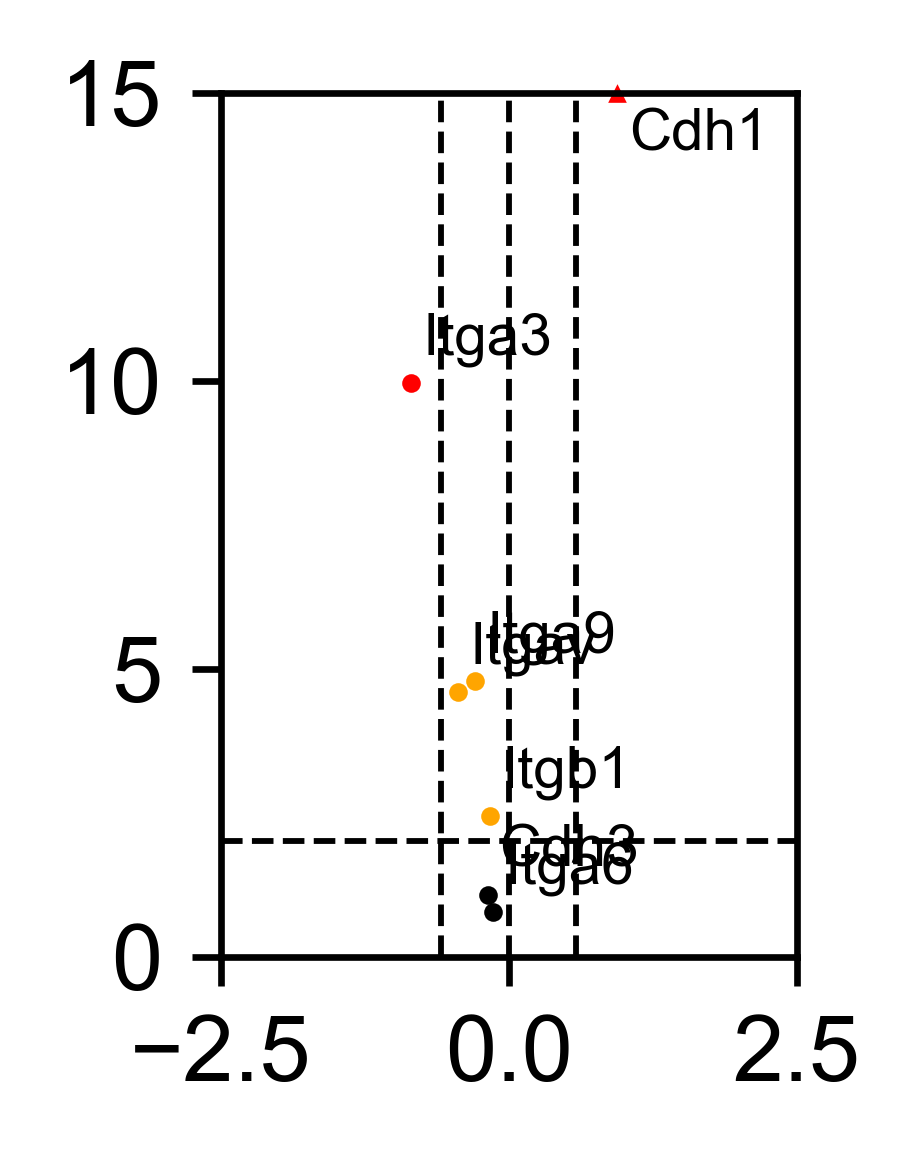

In [207]:
fig_width, fig_height = 1.2, 1.8
xMax, yMax = 2.5, 15

fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot boundary lines
ax.axhline(y=2, ls='--', lw=.7, c='k')
ax.axvline(x=np.log2(1.5), ls='--', lw=.7, c='k')
ax.axvline(x=0, ls='--', lw=.7, c='k')
ax.axvline(x=-np.log2(1.5), ls='--', lw=.7, c='k')

ax.set_xlim([-xMax,xMax])
ax.set_ylim([0,yMax])

for i, txt in enumerate(n):
    if y[i]>yMax:
        ax.scatter(x[i], yMax, marker='^',
                   linewidth=0,
                   s=5,
                   c='r')
        ax.annotate(txt, (x[i]+.1, yMax-1))
    elif y[i]<2:
        ax.scatter(x[i], y[i], marker='o',
                   linewidth=0,
                   s=5,
                   c='k')
        ax.annotate(txt, (x[i]+.1, y[i]+.5))
    elif np.abs(x[i])<np.log2(1.5):
        ax.scatter(x[i], y[i], marker='o',
                   linewidth=0,
                   s=5,
                   c='orange')
        ax.annotate(txt, (x[i]+.1, y[i]+.5))
    else:
        ax.scatter(x[i], y[i], marker='o',
                   linewidth=0,
                   s=5,
                   c='r')
        ax.annotate(txt, (x[i]+.1, y[i]+.5))

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)
    
outputpath = './figures/scatter_cadherin_integrin_genes.svg'
plt.savefig(outputpath)

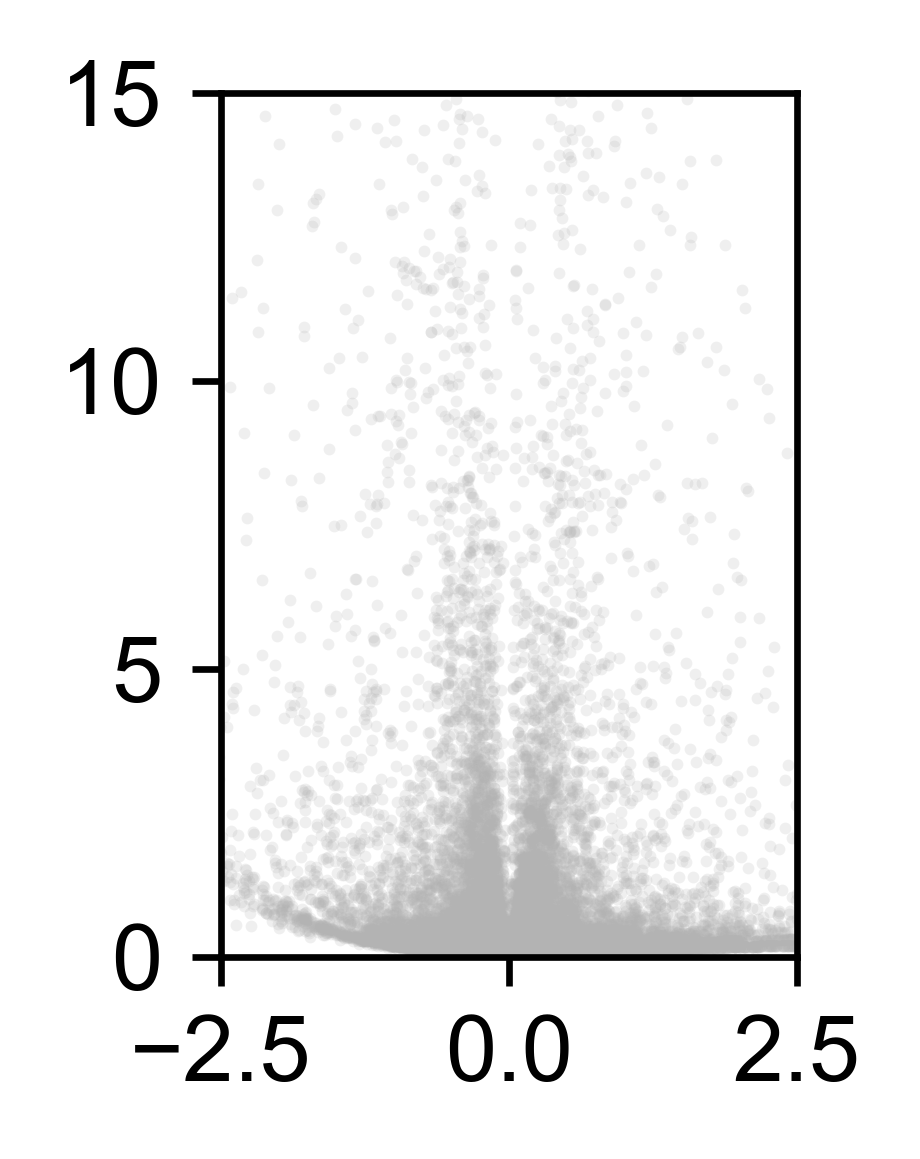

In [209]:
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xMax, yMax = 2.5, 15

# plot all genes as gray circles
ax.scatter(df['Inner bud_l'], df['-Log10_padj'],
           s=2,
           c='.7',
           edgecolors=None,
           linewidth=0,
           alpha=.2)

# # plot boundary lines
# ax.axhline(y=2, ls='--', lw=.7, c='k')
# ax.axvline(x=np.log2(1.5), ls='--', lw=.7, c='k')
# ax.axvline(x=0, ls='--', lw=.7, c='k')
# ax.axvline(x=-np.log2(1.5), ls='--', lw=.7, c='k')

ax.set_xlim([-xMax,xMax])
ax.set_ylim([0,yMax])

outputpath = './figures/scatter_cadherin_integrin_genes_background.png'
plt.savefig(outputpath)

saving figure to file ./figures/scvelo_scatter_plot_Sox10_Krt15_Krt14_Krt19_Col4a1.svg


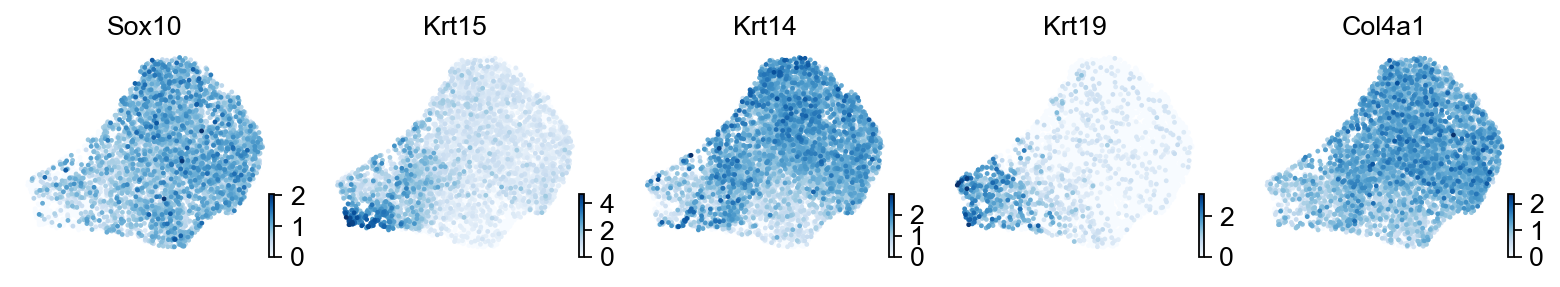

In [6]:
genes = ['Sox10', 'Krt15', 'Krt14', 'Krt19', 'Col4a1']
scv.pl.scatter(adata, basis='umap', color=genes,
               figsize=(14, 10), 
               dpi=300,
#                fontsize=7, legend_fontsize=7,
#                size=6,
               ncols=len(genes),
               save='scatter_plot_'+'_'.join(genes)+'.svg',
               color_map='Blues', frameon=False)

saving figure to file ./figures/scvelo_scatter_plot_Krt14_Trp63_Krt19_Col4a1_Col4a2.svg


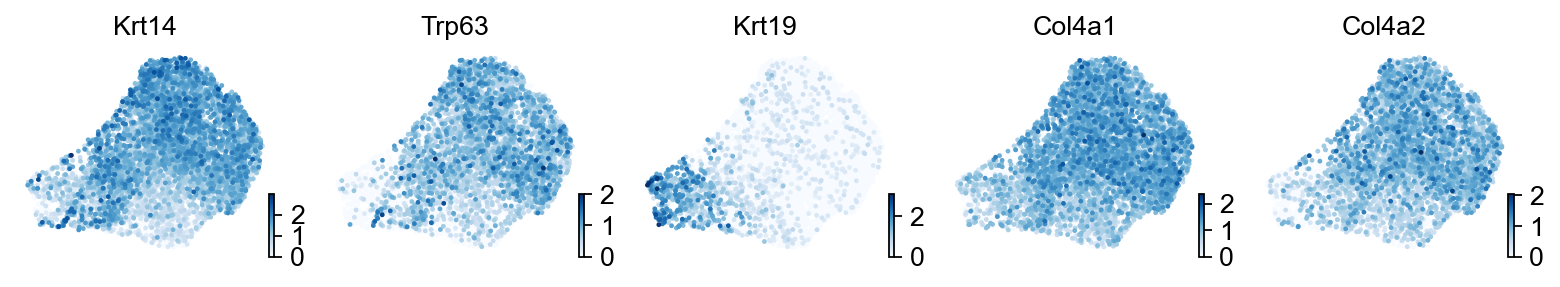

In [242]:
genes = ['Krt14', 'Trp63', 'Krt19', 'Col4a1', 'Col4a2']
scv.pl.scatter(adata, basis='umap', color=genes,
               figsize=(14, 10), 
               dpi=300,
#                fontsize=7, legend_fontsize=7,
#                size=6,
               ncols=len(genes),
               save='scatter_plot_'+'_'.join(genes)+'.svg',
               color_map='Blues', frameon=False)

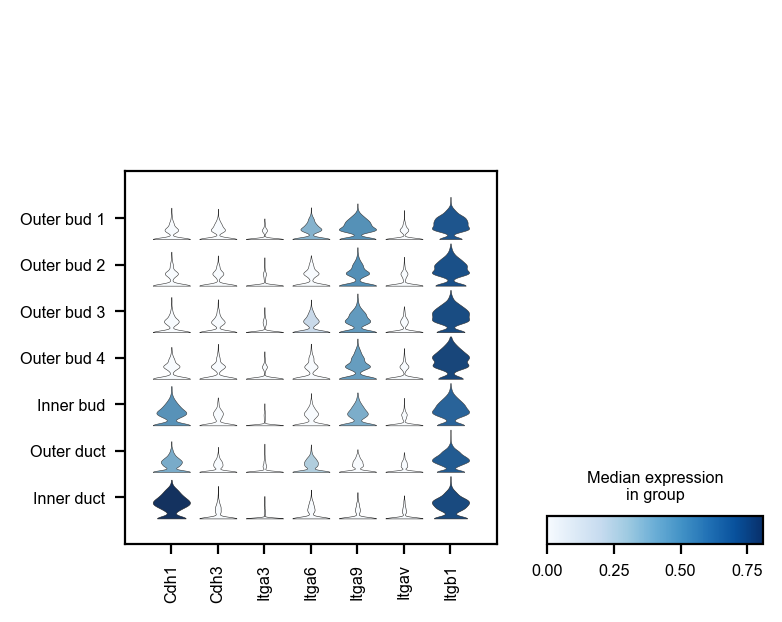

In [55]:
marker_genes = ['Cdh1', 'Cdh3', # Cadherins
                'Itga3', 'Itga6', 'Itga9', 'Itgav', 'Itgb1' # Integrins
               ]

stacked_violin_plot = sc.pl.stacked_violin(E13epi, marker_genes, 'leiden',
                                           categories_order=['Outer bud 1', 'Outer bud 2',
                                                             'Outer bud 3', 'Outer bud 4',
                                                             'Inner bud', 'Outer duct',
                                                             'Inner duct'],
#                                            vmax=0.3,
                                           return_fig=True)
# dotplot = sc.pl.dotplot(adata, marker_genes, groupby='leiden',
# #                         figsize=(7, 2),
# #                         dendrogram=True,
#                         vmax=0.6,

# dotplot.style(cmap='Blues', color_on='dot')
# dotplot.savefig('./figures/E13epi_stacked_violin_Blues.svg')
stacked_violin_plot.show()

In [46]:
import matplotlib
import matplotlib.pyplot as plt

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

In [228]:
leiden_colors = E13epi.uns['leiden_colors']
leiden_categories = ['Outer bud 1', 'Outer bud 2', 'Outer duct',
                     'Outer bud 3', 'Outer bud 4',
                      'Inner bud', 'Inner duct']

# construct a palette dictonary
paletteDict = {}
for i in range(len(leiden_categories)):
    paletteDict[leiden_categories[i]] = leiden_colors[i]

paletteDict

{'Outer bud 1': '#1f77b4',
 'Outer bud 2': '#ff7f0e',
 'Outer duct': '#2ca02c',
 'Outer bud 3': '#d62728',
 'Outer bud 4': '#9467bd',
 'Inner bud': '#8c564b',
 'Inner duct': '#e377c2'}

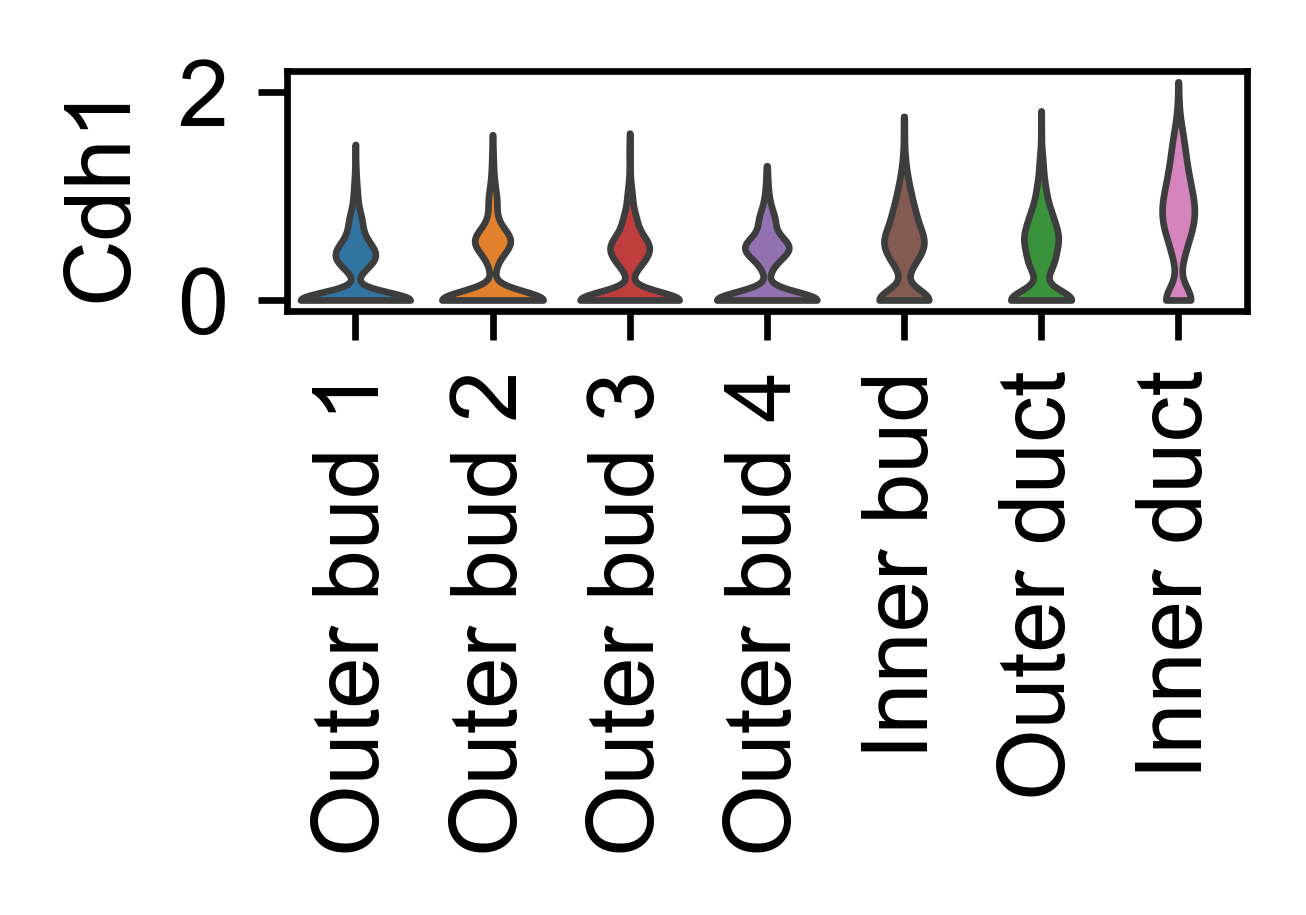

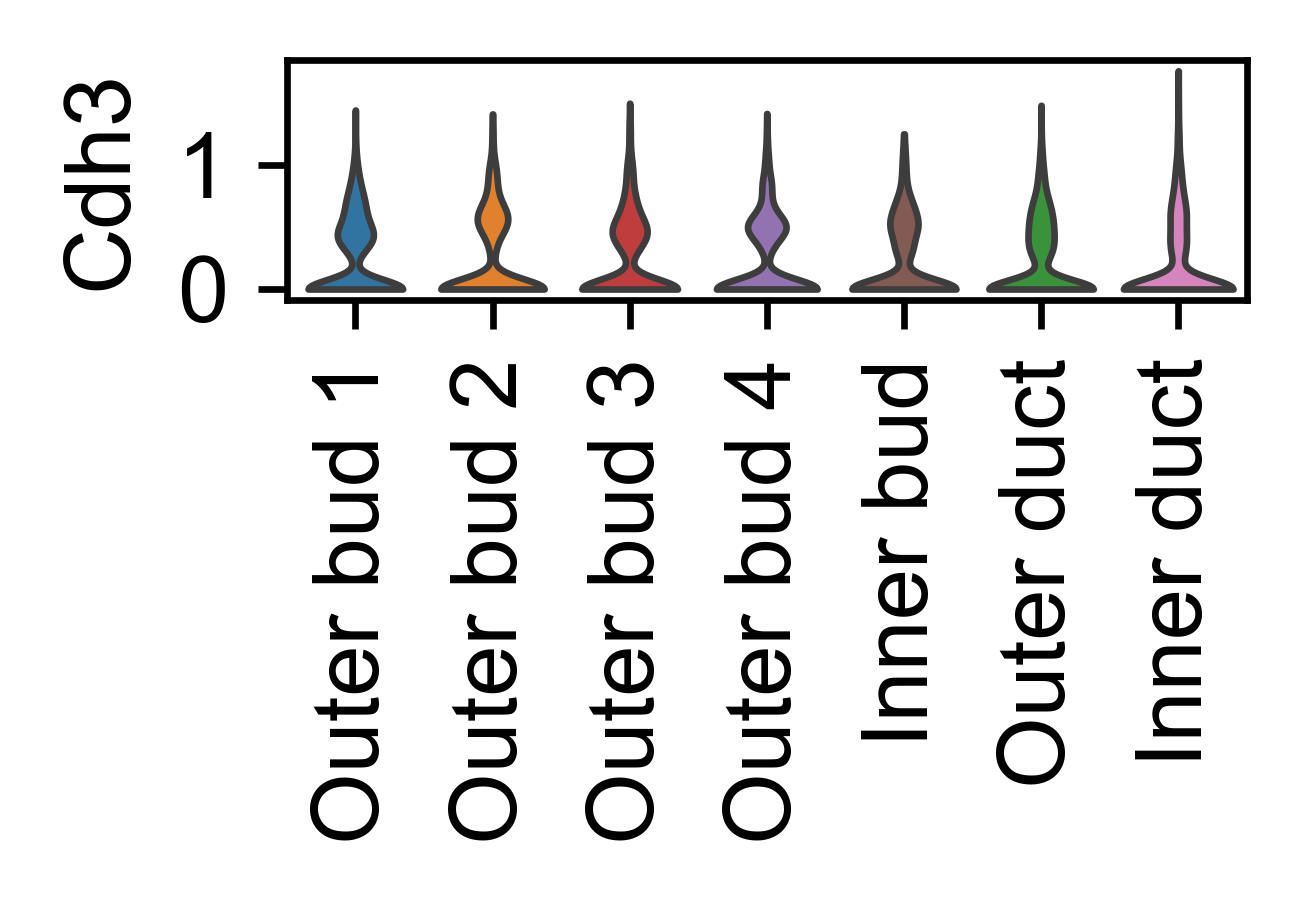

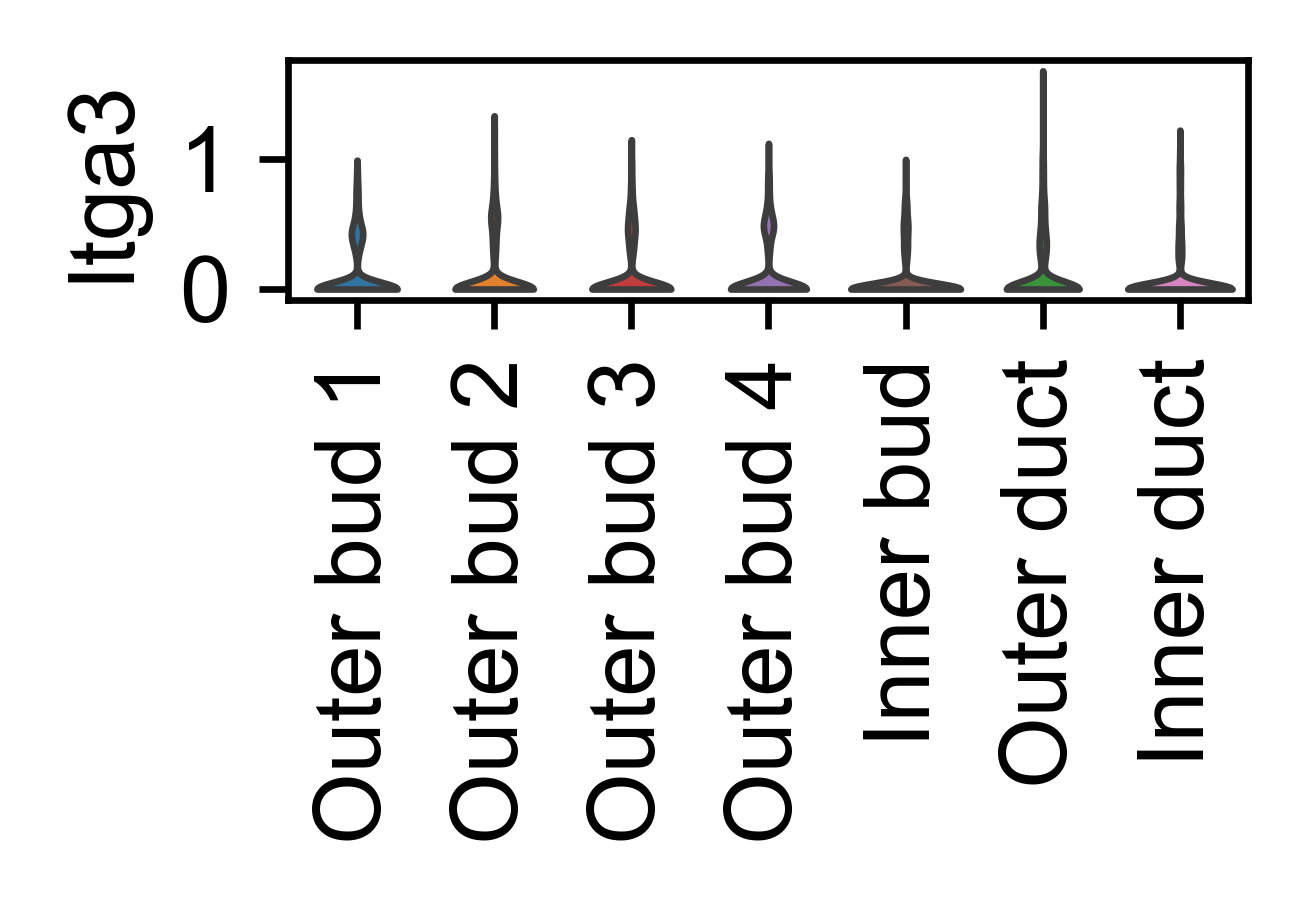

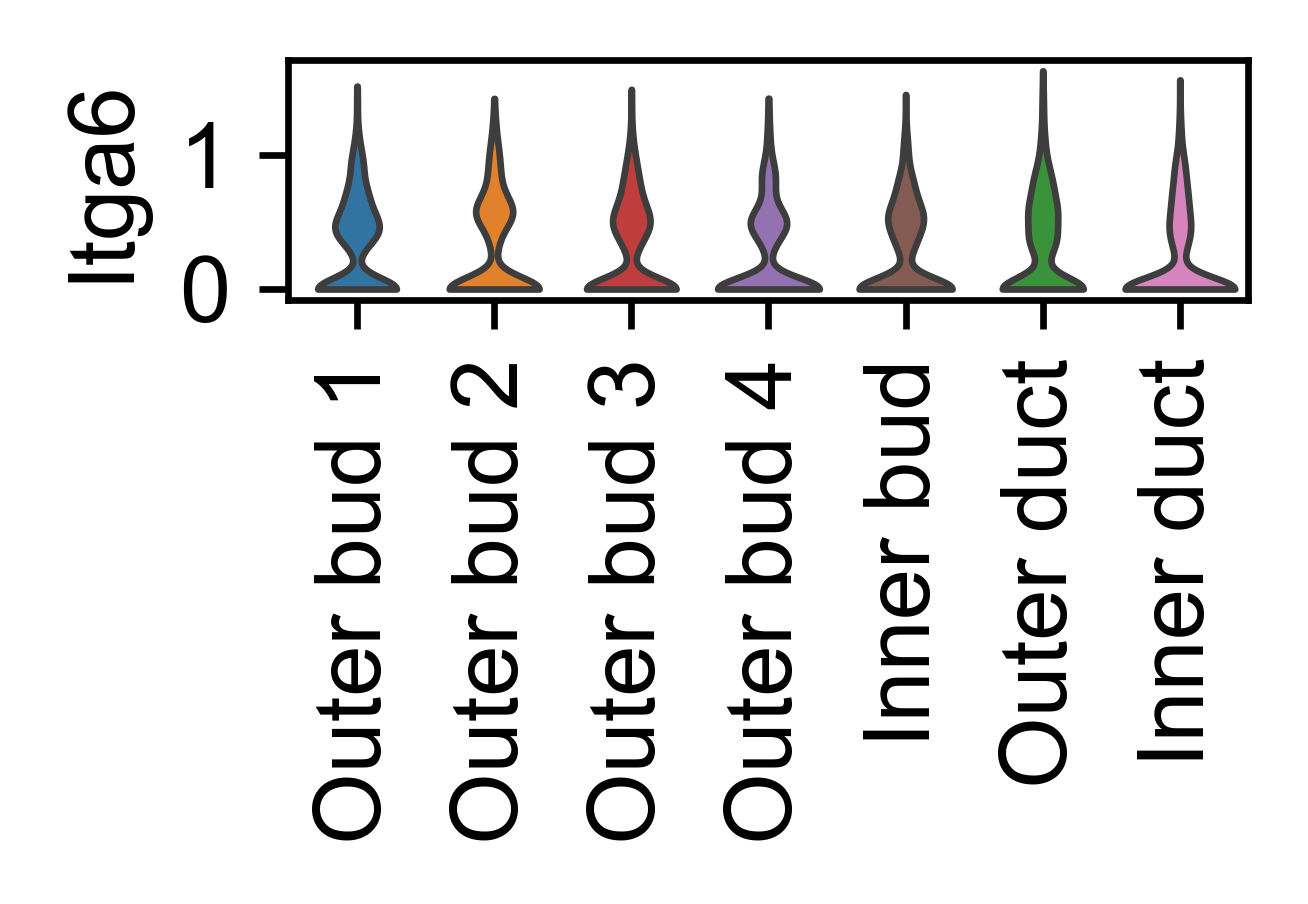

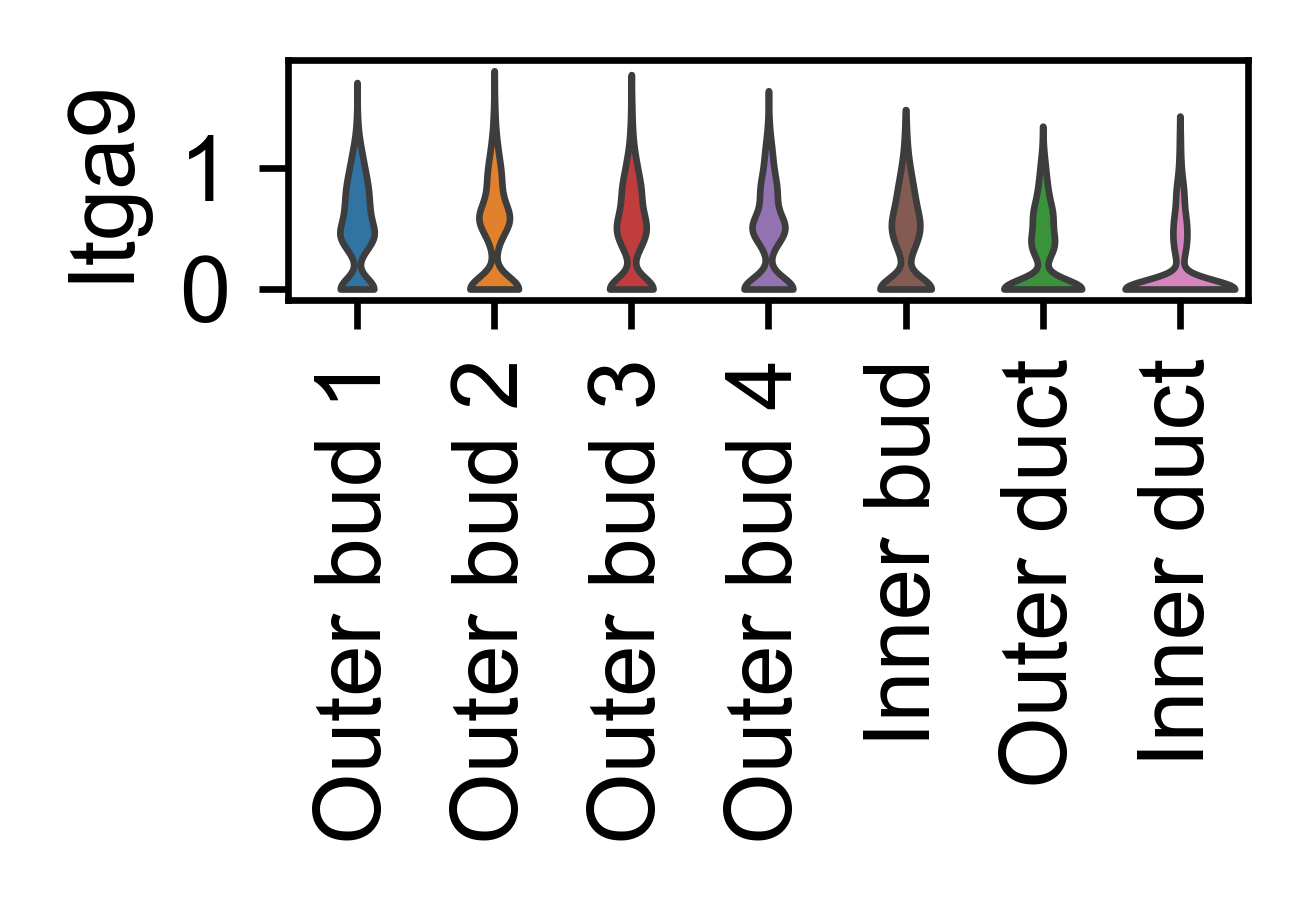

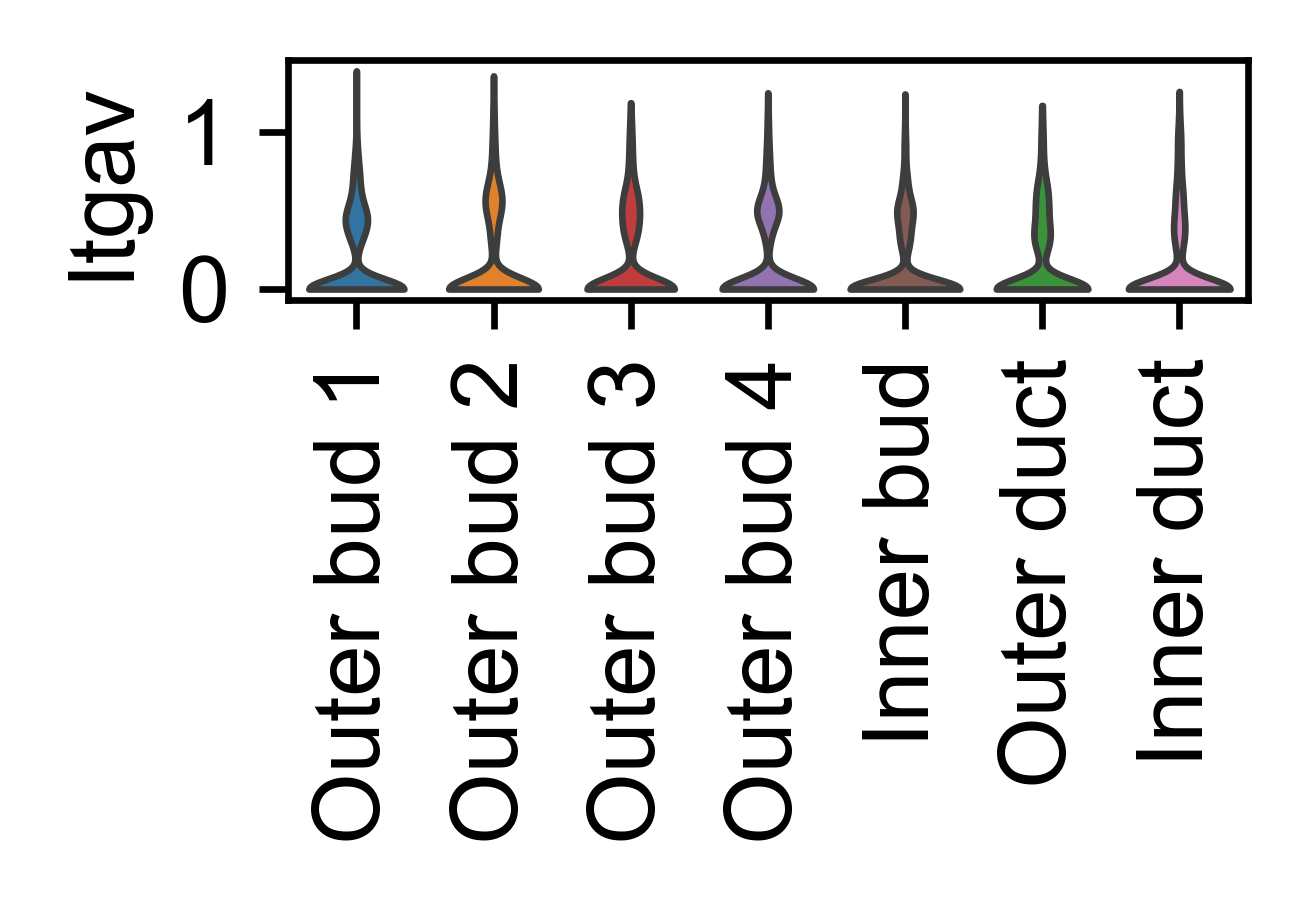

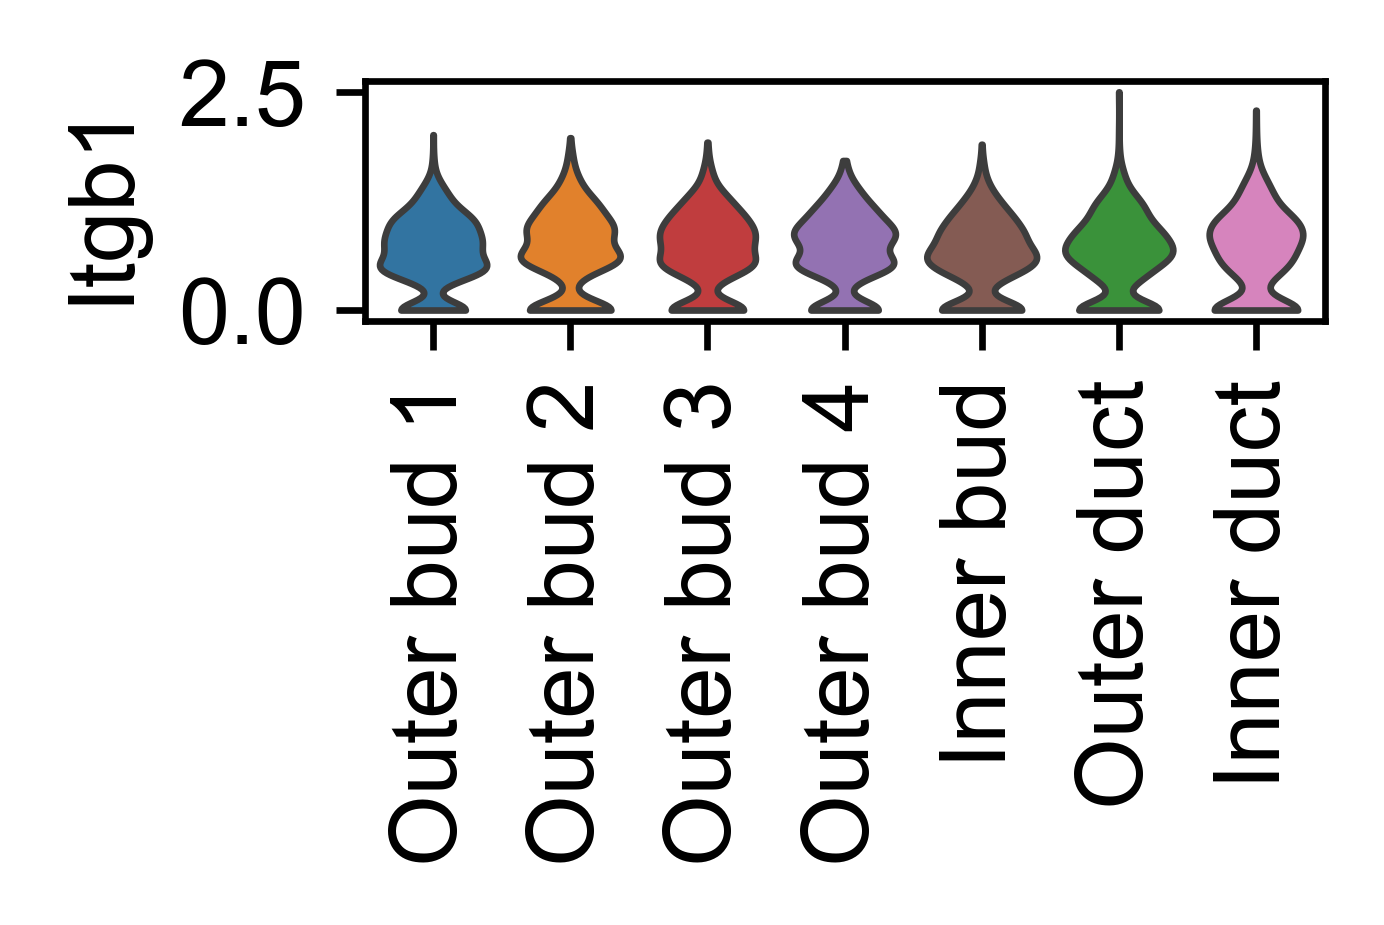

In [229]:
genes = ['Cdh1', 'Cdh3', # Cadherins
         'Itga3', 'Itga6', 'Itga9', 'Itgav', 'Itgb1' # Integrins
        ]


for gene in genes:
    font = {'family' : 'Arial', 'size'   : 7}
    matplotlib.rc('font', **font)
    plt.rcParams['svg.fonttype'] = 'none'
    
    fig_width, fig_height = 2, 0.5
    fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    sc.pl.violin(E13epi, gene, 'leiden',
                 order=['Outer bud 1', 'Outer bud 2',
                        'Outer bud 3', 'Outer bud 4',
                        'Inner bud', 'Outer duct',
                        'Inner duct'],
                 rotation=90,
                 stripplot=False,
                 palette=paletteDict,
                 linewidth=.8,
                 scale='area',
#                  inner='quartile',
                 ax=ax,
                 cut=0,
                 save='_E13epi_'+gene+'.svg')
    
#     # rotate x tick labels if necessary
#     x_labels = ax.get_xticklabels()
#     ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")


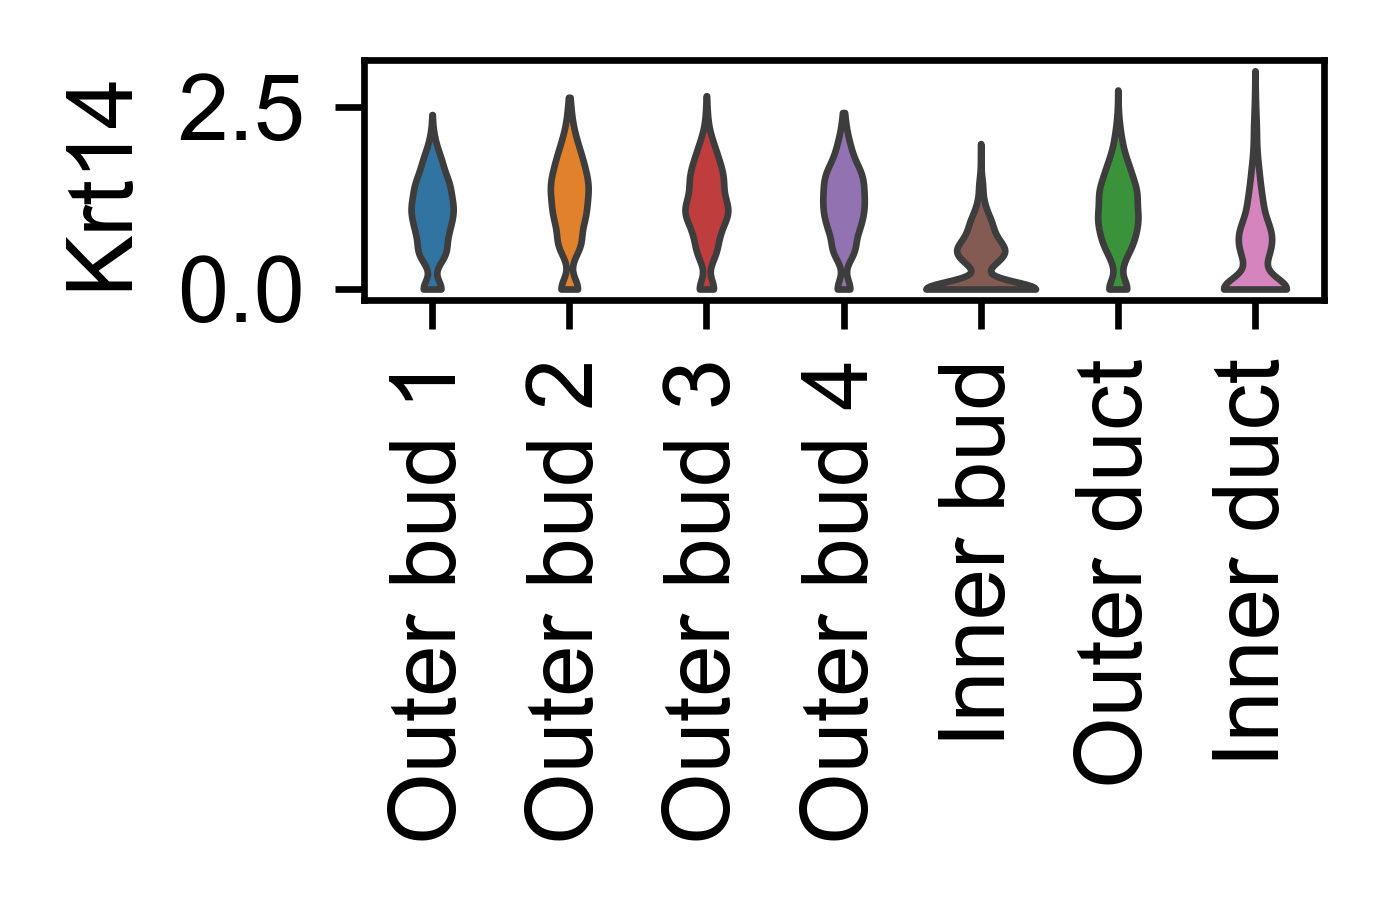

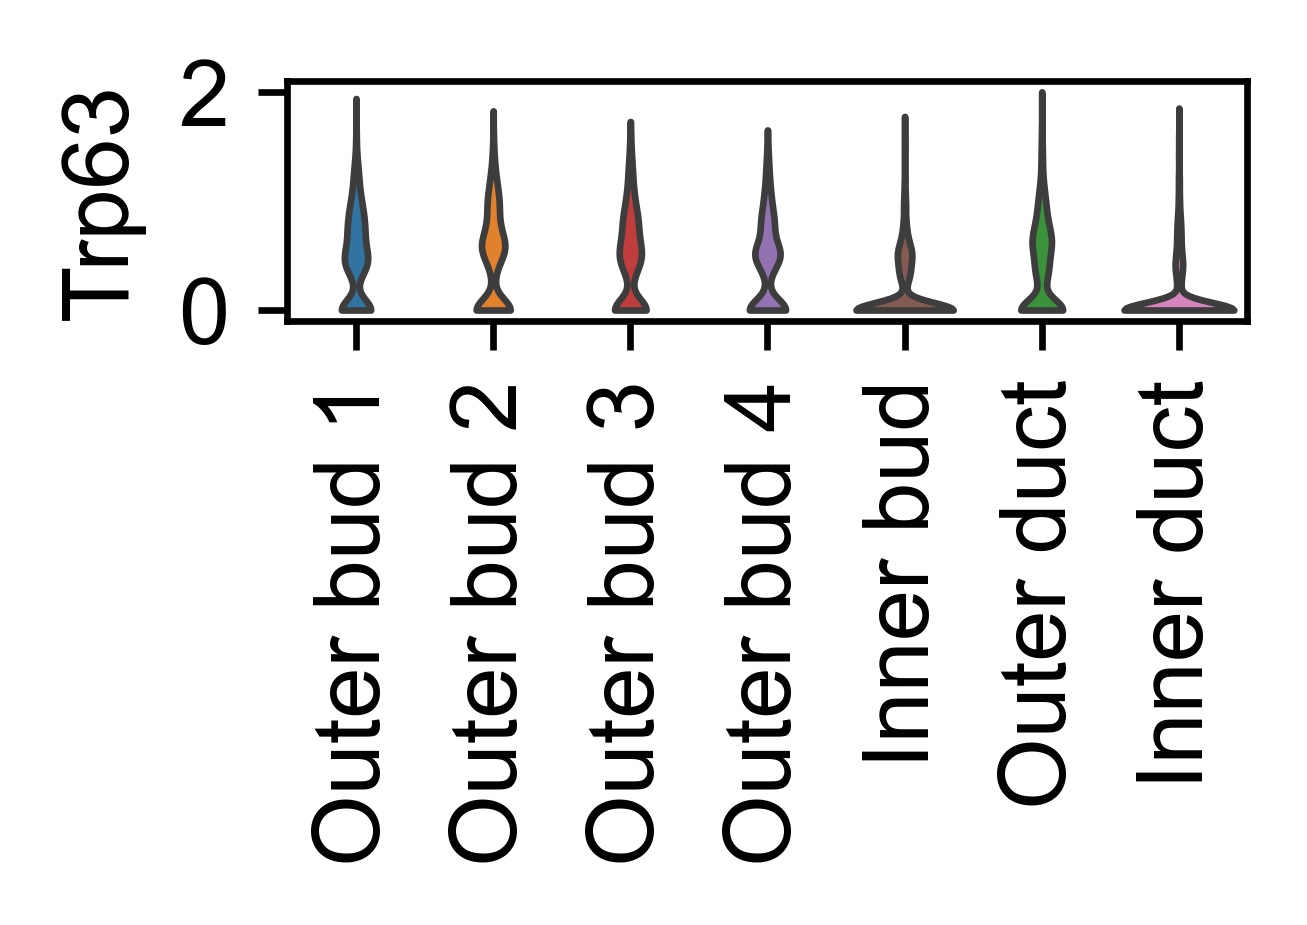

In [243]:
genes = ['Krt14', 'Trp63'
        ]


for gene in genes:
    font = {'family' : 'Arial', 'size'   : 7}
    matplotlib.rc('font', **font)
    plt.rcParams['svg.fonttype'] = 'none'
    
    fig_width, fig_height = 2, 0.5
    fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    sc.pl.violin(E13epi, gene, 'leiden',
                 order=['Outer bud 1', 'Outer bud 2',
                        'Outer bud 3', 'Outer bud 4',
                        'Inner bud', 'Outer duct',
                        'Inner duct'],
                 rotation=90,
                 stripplot=False,
                 palette=paletteDict,
                 linewidth=.8,
                 scale='area',
#                  inner='quartile',
                 ax=ax,
                 cut=0,
                 save='_E13epi_'+gene+'.svg')
    
#     # rotate x tick labels if necessary
#     x_labels = ax.get_xticklabels()
#     ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")
